In [90]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
from sklearn.preprocessing import PolynomialFeatures, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
#Model Performance Evaluators
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import numpy as np
from xgboost import XGBClassifier
from collections import Counter

In [84]:
!pip install xgboost

# Load the standard packages for working with data

C:\Users\dplaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Ages')

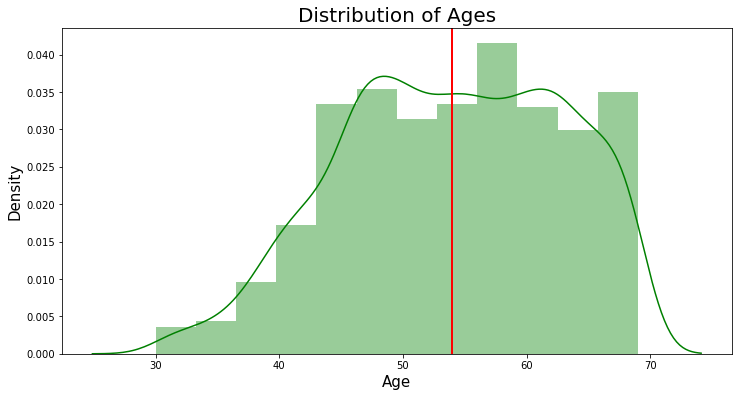

In [91]:
from pandas.core.indexing import length_of_indexer
df = pd.read_csv("Breast_Cancer.csv")

plt.figure(figsize=(12,6))
median_age = df.Age.median()
sns.distplot(df.Age, color= 'g', kde =True, bins=12)
plt.axvline(median_age
            ,color='red',linewidth=2,label='Median Age')
plt.xlabel('Age',fontdict={'fontsize':15})
plt.ylabel('Density',fontdict={'fontsize':15})
plt.title("Distribution of Ages",fontdict={'fontsize':20})

In [92]:
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])
data = np.array(df)
X = data[:,0:data.shape[1]-1]
y = data[:, -1]
print(X.shape)
print(y.shape)

print(df)

(4024, 15)
(4024,)
      Age  Race  Marital Status  T Stage   N Stage  6th Stage  differentiate  \
0      38     2               1         0        0          0              1   
1      20     2               1         1        1          2              0   
2      28     2               0         2        2          4              0   
3      28     2               1         0        0          0              1   
4      17     2               1         1        0          1              1   
...   ...   ...             ...       ...      ...        ...            ...   
4019   32     1               1         0        0          0              0   
4020   26     2               0         1        1          2              0   
4021   38     2               1         1        0          1              0   
4022   28     0               0         1        0          1              0   
4023   16     2               1         1        0          1              0   

      Grade  A Stage

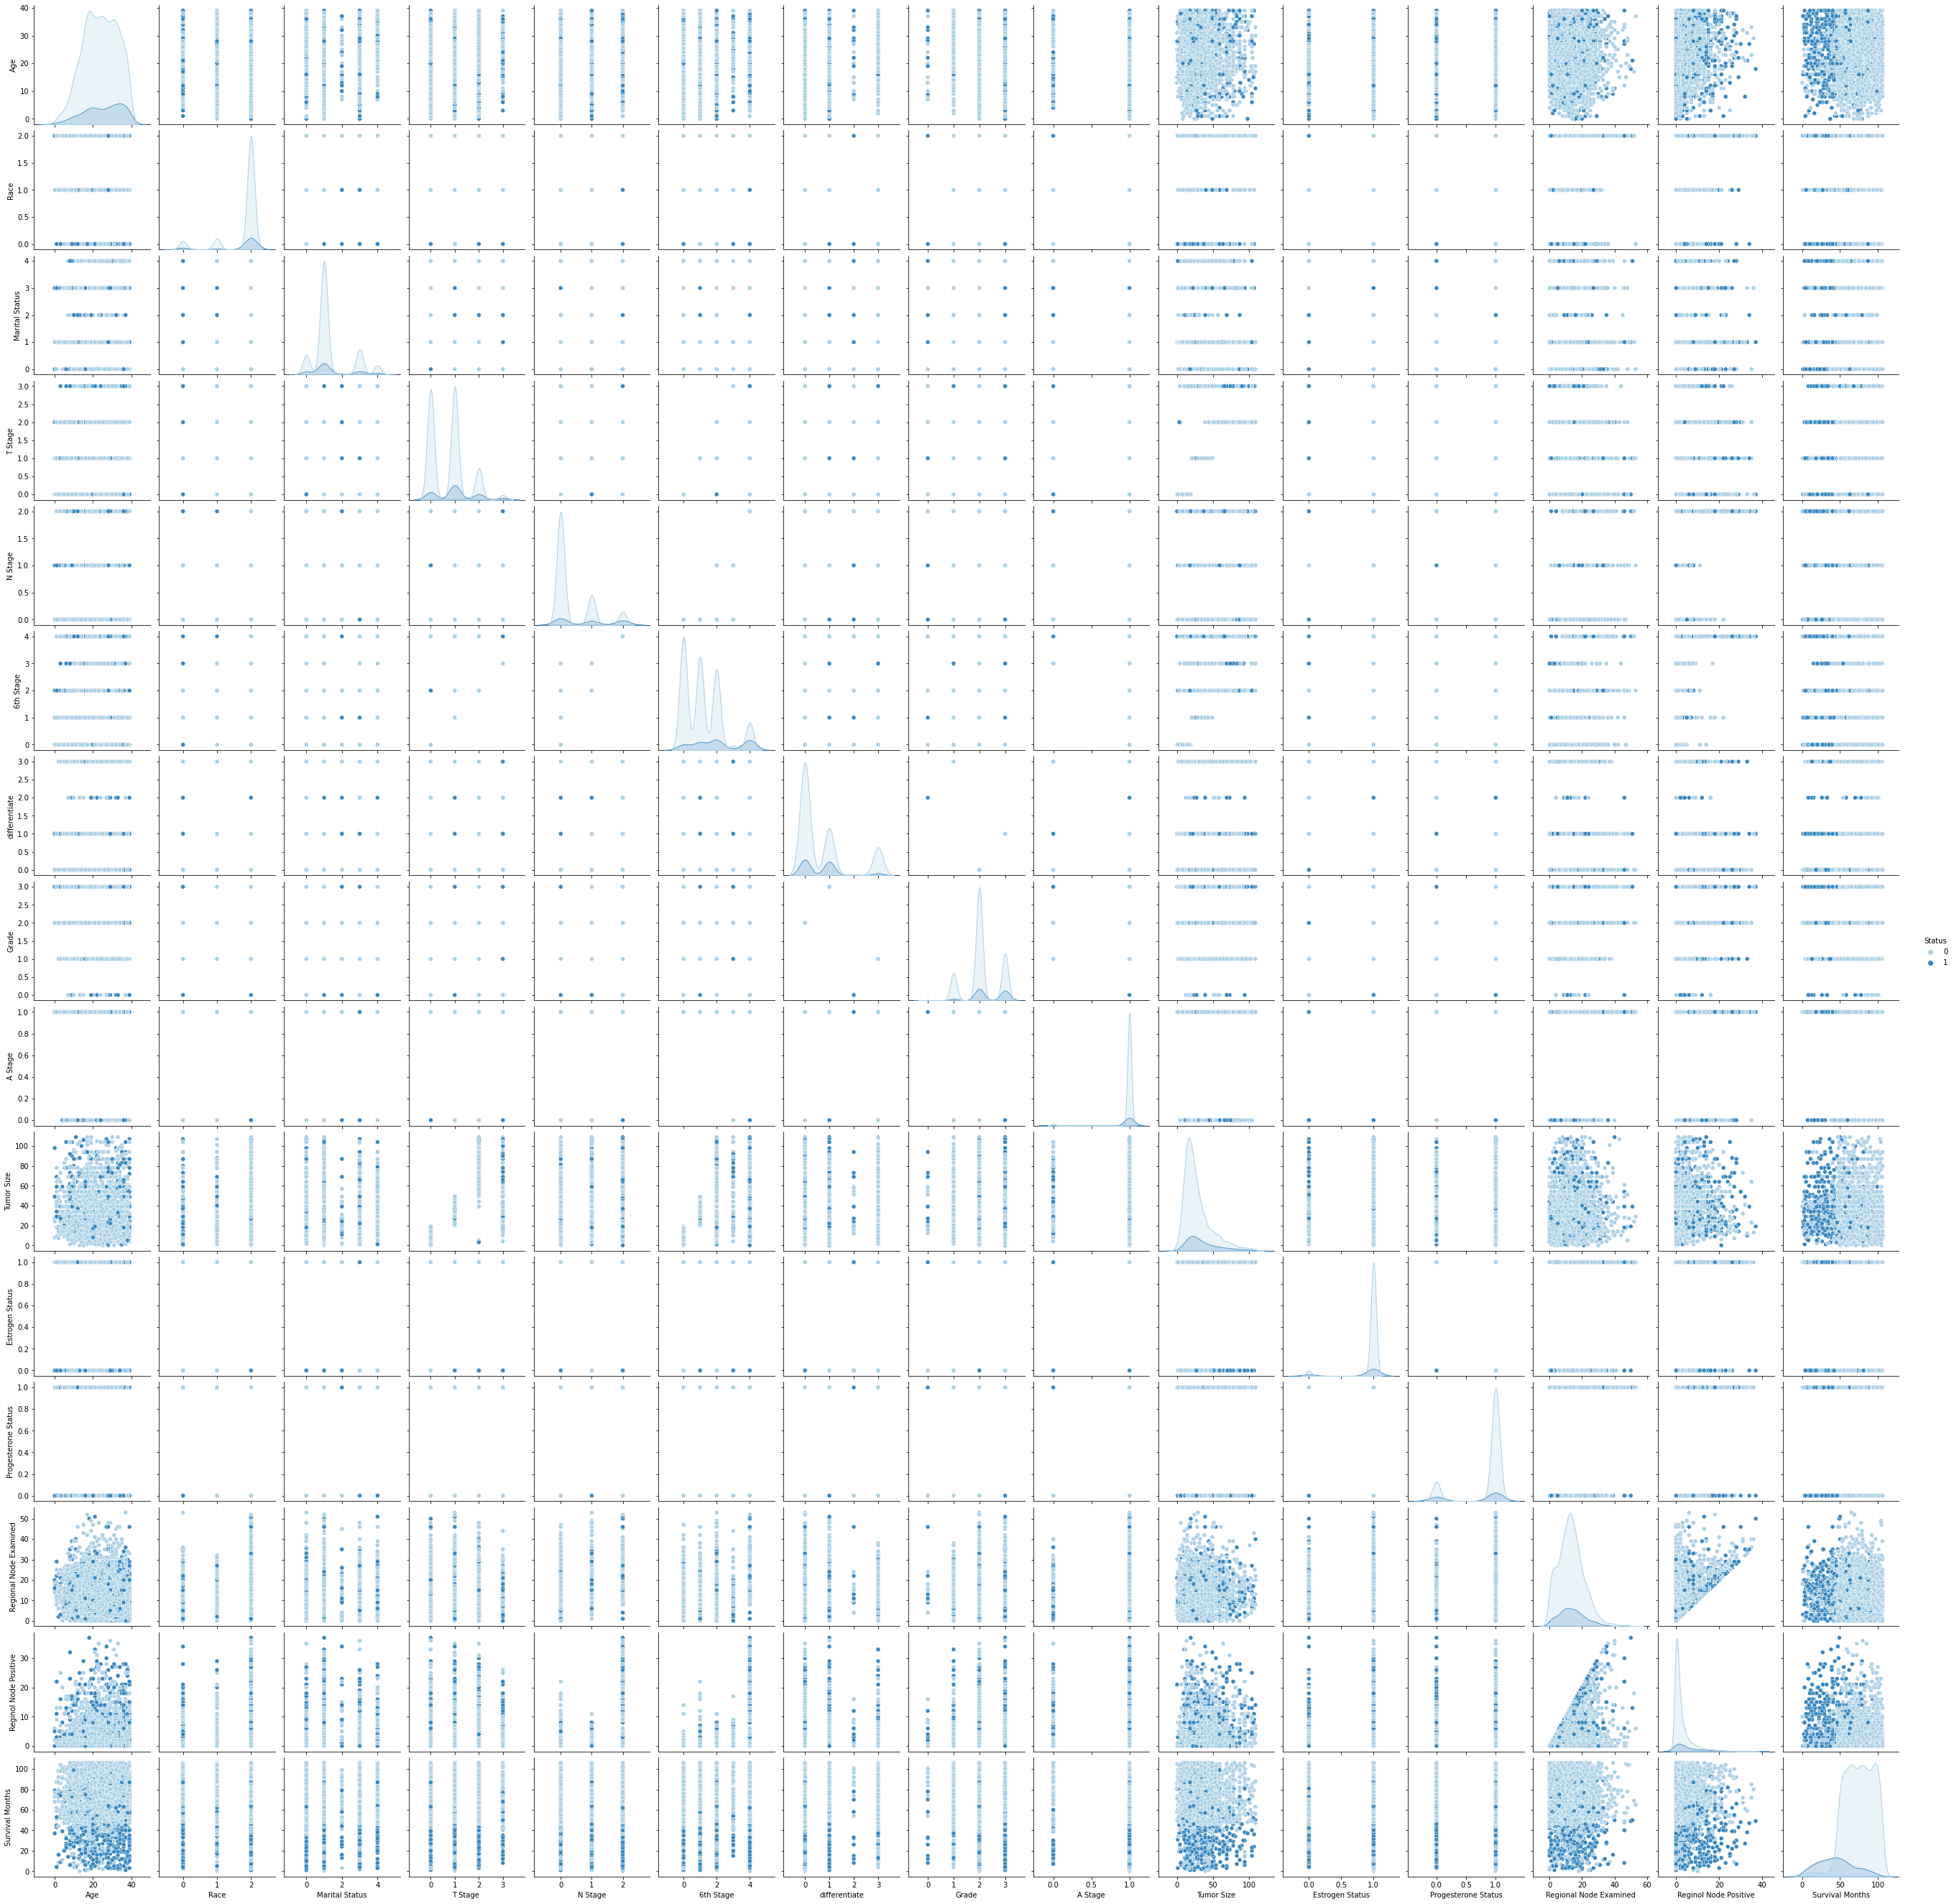

In [179]:
plt.rcParams['font.size']= 10
sns.pairplot(df,hue='Status', palette='Blues')

C:\Users\dplaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Ages of Womans with Breast Cancer')

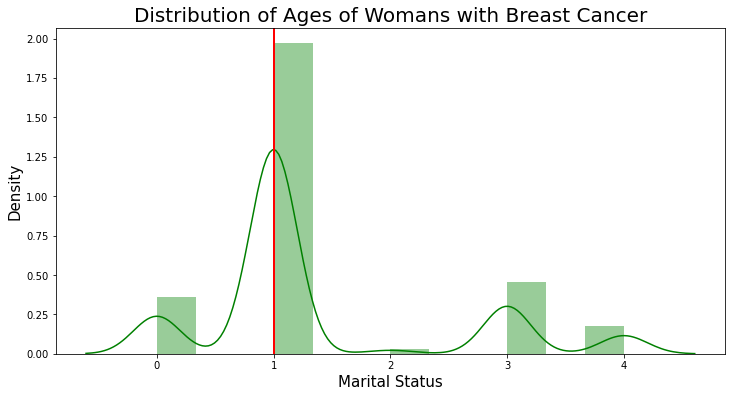

In [93]:
plt.figure(figsize=(12,6))
median_age = df["Marital Status"].median()
sns.distplot(df["Marital Status"], color= 'g', kde =True, bins=12)
plt.axvline(median_age
            ,color='red',linewidth=2,label='Median Marital status')
plt.xlabel('Marital Status',fontdict={'fontsize':15})
plt.ylabel('Density',fontdict={'fontsize':15})
plt.title("Distribution of Ages of Womans with Breast Cancer",fontdict={'fontsize':20})

C:\Users\dplaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Races of Womans with Breast Cancer')

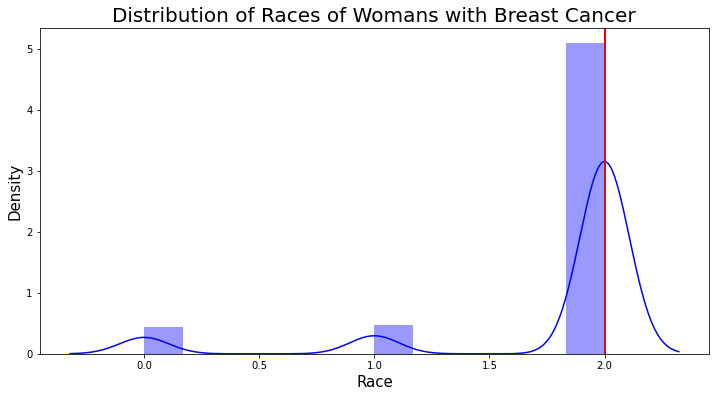

In [94]:

plt.figure(figsize=(12,6))
median_age = df.Race.median()
sns.distplot(df.Race, color= 'b', kde =True, bins=12)
plt.axvline(median_age
            ,color='red',linewidth=2,label='Median Race')
plt.xlabel('Race',fontdict={'fontsize':15})
plt.ylabel('Density',fontdict={'fontsize':15})
plt.title("Distribution of Races of Womans with Breast Cancer",fontdict={'fontsize':20})

# Encoding Labels And Target 

In [95]:
# T-Stage: The T refers to the size and extent of the main tumor
# N-Stage:  lymph nodes before they reach other parts of the body. 
# The N category can be assigned a letter or a number: 
# NX means there's no information about the nearby lymph nodes
#6th stage: IIA, IIB, IIIA, IIIB, IIIC
#Differentiate: Poorly differentiated, Moderately differentiated, Well differentiated
#Regional or Distant

In [96]:

#enc = OrdinalEncoder().fit(X[:,1].reshape(-1,1))


#enc.categories_=[["T1","T2","T3"],[1, 2,3]]

#X[:,1]= enc.transform(X[:,1].reshape(-1,1)).reshape(1,-1)

"""
X = np.where(X =="T1",1,X)
X = np.where(X =="T2",2,X)
X = np.where(X =="T3",3,X)
X = np.where(X =="T4",4,X)

X = np.where(X =="N1",1,X)
X = np.where(X =="N2",2,X)
X = np.where(X =="N3",3,X)

X = np.where(X =="IIIC",5,X)
X = np.where(X =="IIIB",4,X)
X = np.where(X =="IIIA",3,X)

X = np.where(X =="IIB",2,X)
X = np.where(X =="IIA",1,X)

X = np.where(X=="Undifferentiated",1,X)
X = np.where(X =="Poorly differentiated",2,X)
X = np.where(X =="Moderately differentiated",3,X)
X = np.where(X =="Well differentiated",4,X)
X = np.where(X==" anaplastic; Grade IV",4,X)
lb = preprocessing.LabelBinarizer(neg_label=-1, pos_label=0)  # Binary encoding
X[:,6] = np.abs(lb.fit_transform(X[:,6])).reshape(4024,)
lb = preprocessing.LabelBinarizer(neg_label=-1, pos_label=0)  # Binary encoding
X[:,8] = np.abs(lb.fit_transform(X[:,8])).reshape(4024,)
lb = preprocessing.LabelBinarizer(neg_label=-1, pos_label=0)  # Binary encoding
X[:,9] = np.abs(lb.fit_transform(X[:,9])).reshape(4024,)
lb = preprocessing.LabelBinarizer(neg_label=-1, pos_label=0)  # Binary encoding
y = np.abs(lb.fit_transform(y)).reshape(4024,)
"""

'\nX = np.where(X =="T1",1,X)\nX = np.where(X =="T2",2,X)\nX = np.where(X =="T3",3,X)\nX = np.where(X =="T4",4,X)\n\nX = np.where(X =="N1",1,X)\nX = np.where(X =="N2",2,X)\nX = np.where(X =="N3",3,X)\n\nX = np.where(X =="IIIC",5,X)\nX = np.where(X =="IIIB",4,X)\nX = np.where(X =="IIIA",3,X)\n\nX = np.where(X =="IIB",2,X)\nX = np.where(X =="IIA",1,X)\n\nX = np.where(X=="Undifferentiated",1,X)\nX = np.where(X =="Poorly differentiated",2,X)\nX = np.where(X =="Moderately differentiated",3,X)\nX = np.where(X =="Well differentiated",4,X)\nX = np.where(X==" anaplastic; Grade IV",4,X)\nlb = preprocessing.LabelBinarizer(neg_label=-1, pos_label=0)  # Binary encoding\nX[:,6] = np.abs(lb.fit_transform(X[:,6])).reshape(4024,)\nlb = preprocessing.LabelBinarizer(neg_label=-1, pos_label=0)  # Binary encoding\nX[:,8] = np.abs(lb.fit_transform(X[:,8])).reshape(4024,)\nlb = preprocessing.LabelBinarizer(neg_label=-1, pos_label=0)  # Binary encoding\nX[:,9] = np.abs(lb.fit_transform(X[:,9])).reshape(4024,)

In [130]:
"""
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,test_size = 0.14, random_state=10, shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size = 0.14, random_state=10, shuffle=True)
"""
sm = SMOTE(random_state=0, n_jobs=8, sampling_strategy=1.0)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_train_resampled))




Original dataset shape: Counter({0: 2709, 1: 510})
Resampled dataset shape: Counter({0: 2709, 1: 2709})


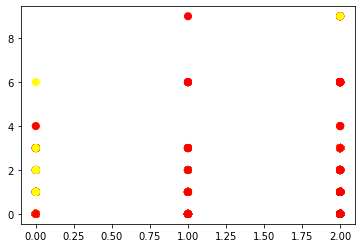

In [98]:
plt.scatter(X[:, 1], (X[:, 3]*X[:, 6]), c=y, s=50, cmap='autumn');

C:\Users\dplaz\AppData\Local\Temp\ipykernel_25944\3084176483.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(X[:, 1].astype(float)), np.cos(X[:, 3].astype(float)), c=y, s=50, cmap='autumn');


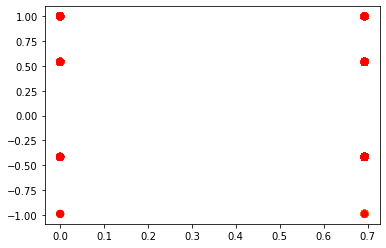

In [99]:
plt.scatter(np.log(X[:, 1].astype(float)), np.cos(X[:, 3].astype(float)), c=y, s=50, cmap='autumn');

In [100]:
f = pd.isna(X)
for i in f:
    if i == True:
        print("Nan")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [197]:

num_folds = 10
seed = 7
scoring = 'accuracy'
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
penalty = ['l1', 'l2']
param_grid = dict(C=c_values, penalty=penalty)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))


Best: 0.8956125074979198 using {'C': 1.3, 'penalty': 'l2'}


C:\Users\dplaz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dplaz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dplaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dplaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Va

In [236]:
logreg = LogisticRegression(C=0.3, solver='liblinear', class_weight=class_weight, penalty = 'l2', random_state=42)
logreg.fit(X_train_resampled**3, y_train_resampled)
y_hat_logreg = logreg.predict(X_train_resampled)
acc_logreg = logreg.score(X_train_resampled, y_train_resampled)
print("Q18 - Accuracy on training data = %f" % acc_logreg)
y_hat_logreg = logreg.predict(X_test_scaled)
acc_logreg = logreg.score(X_test_scaled, y_test)
print("Q18 - Accuracy on test data = %f" % acc_logreg)

Q18 - Accuracy on training data = 0.726652
Q18 - Accuracy on test data = 0.908075


In [116]:
print(f1_score(y_test, y_hat_logreg))

0.4776119402985075


In [202]:
class_weight = {}

for i in range(len(np.unique(y))):
    #for x in [np.around((len(targets[targets==i]))/(targets.shape[0]),4)]     #Actual Weights
    
    for x in [0.5]:                                                 #Since we want equal weights to be given to classes
        class_weight[i] = x
        
print('=== CLASS WEIGHT ===')
print(class_weight)

=== CLASS WEIGHT ===
{0: 0.5, 1: 0.5}


In [203]:

names = ['Logistic Regression', "KNN", "Linear SVM","Gradient Boosting", "Decision Tree", "Random_Forest"]
classifiers = [
    LogisticRegression(solver='liblinear', class_weight=class_weight, random_state=42),
    KNeighborsClassifier(n_neighbors=3, weights= 'distance'),
    SVC(kernel="linear", C=0.025, class_weight=class_weight, random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    DecisionTreeClassifier(max_depth=5, class_weight=class_weight, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=100, class_weight=class_weight, random_state=42)]


In [206]:

scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_resampled**3, y_train_resampled)
    score = clf.score(X_test_scaled, y_test)
    scores.append(score)
scores_df = pd.DataFrame()
scores_df['name'] = names
scores_df['score'] = np.around(scores,3)
scores_df.sort_values('score', ascending= False)


,name,score
0,Logistic Regression,0.904
4,Decision Tree,0.892
2,Linear SVM,0.871
3,Gradient Boosting,0.790
5,Random_Forest,0.768
1,KNN,0.758


In [ ]:
w_logreg = logreg.coef_ 
intercept_logreg = logreg.intercept_ 
print('Q19 - w_logreg: ', w_logreg) 
print('Q19 - intercept_logreg: ', intercept_logreg) 
print(y_hat_logreg)

# SVM


In [81]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
# Create a classifier: a support vector classifier
accuracy_dict_svm = {}
X_train_resampled[:,0] = np.cosh(X_train_resampled[:,0]**(1/3))
X_train_resampled[:,1] = np.cosh(X_train_resampled[:,1]**(1/3))
X_train_resampled[:,2] = np.cosh(X_train_resampled[:,2]**(1/3))
X_train_resampled[:,3] = np.cosh(X_train_resampled[:,3]**(1/3))
X_train_resampled[:,6] = np.cosh(X_train_resampled[:,6]**(1/3))
#age, t-stage, n-stage, 6th stage
svc = SVC(kernel="linear", C=0.00455)
print(X_train_resampled)
svc.fit(X_train_resampled,y_train_resampled)
y_pred_scv=svc.predict(X_test_scaled)
#accuracy_dict_svm.update({(1/i):accuracy_score(y_test,y_pred_scv)*100})
#print(max(accuracy_dict_svm, key=accuracy_dict_svm.get))

#lists = sorted(accuracy_dict_svm.items()) # sorted by key, return a list of tuples

#a, b = zip(*lists) # unpack a list of pairs into two tuples

#plt.plot(a, b)
#plt.show()

[[1.30148587 1.54308063 1.20507464 ... 0.30188679 0.         0.72380952]
 [1.52287062 1.54308063 1.         ... 0.20754717 0.24324324 0.07619048]
 [1.30148587 1.54308063 1.20507464 ... 0.20754717 0.16216216 0.65714286]
 ...
 [1.40311264 1.54308063 1.18493589 ... 0.17507885 0.11565349 0.64781451]
 [1.40438458 1.54308063 1.20507464 ... 0.32414507 0.         0.40260416]
 [1.26726634 1.54308063 1.20890961 ... 0.28301887 0.35098291 0.65143023]]


In [82]:
y_pred_scv=svc.predict(X_test_scaled)
print('accuracy_score: ',accuracy_score(y_test,y_pred_scv))


accuracy_score:  0.8397515527950311


In [ ]:
svc = SVC(kernel="linear", C=10)
svc.fit(X_train,y_train)
y_pred_scv=svc.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred_scv))

# Nerual Networks

In [146]:
from sklearn.metrics import accuracy_score
import numpy.random as r


# One-vs-all encoding

### One-vs-all encoding
Our target is an integer in the range [0,..,9], so we will have 10 output neuron's in our network.  

-  If  $y=0$, we want the output neurons to have the values $(1,0,0,0,0,0,0,0,0,0)$

-  If  $y=1$ we want the output neurons to have the values $(0,1,0,0,0,0,0,0,0,0)$
-  etc

Thus we need to change our target so it is the same as our hoped for output of the neural network.  
-  If $y=0$ we change it into the vector $(1,0,0,0,0,0,0,0,0,0)$. 
-  If $y=1$ we change it into the vector $(0,1,0,0,0,0,0,0,0,0)$
-  etc

See page 29 from the website listed above

The code to covert the target vector

In [147]:
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

In [148]:
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)
print(y_train[0:4])
print(y_v_train[0:4])

[0 1 0 0]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Creating the neural network

### The activation function and its derivative

We will use the sigmoid activation function:  $f(z)=\frac{1}{1+e^{-z}}$

The deriviative of the sigmoid function is: $f'(z) = f(z)(1-f(z))$ 

In [149]:
def f(z):
    return 1 / (1 + np.exp(-z))


def f_deriv(z):
    return f(z) * (1 - f(z))

### Creating and initialing W and b
We want the weights in W to be different so that during back propagation the nodes on a level will have different gradients and thus have different update values.

We want the  weights to be small values, since the sigmoid is almost "flat" for large inputs.

Next is the code that assigns each weight a number uniformly drawn from $[0.0, 1.0)$.  The code assumes that the number of neurons in each level is in the python list *nn_structure*.

In the code, the weights, $W^{(\ell)}$ and $b^{(\ell)}$ are held in a python dictionary

In [150]:
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

### Initializing $\triangledown W$ and $\triangledown b$
Creating $\triangledown W^{(\ell)}$ and $\triangledown b^{(\ell)}$ to have the same size as $W^{(\ell)}$ and $b^{(\ell)}$, and setting $\triangledown W^{(\ell)}$, and  $\triangledown b^{(\ell)}$ to zero

In [151]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

## Feed forward
Perform a forward pass throught the network.  The function returns the values of $a$ and $z$

In [152]:
def feed_forward(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

## Compute $\delta$
The code below compute $\delta^{(s_l)}$ in a function called "calculate_out_layer_delta",  and  computes $\delta^{(\ell)}$ for the hidden layers in the function called "calculate_hidden_delta".  

If we wanted to have a different cost function, we would change the "calculate_out_layer_delta" function.

In [153]:
def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_deriv(z_out) 


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

## The Back Propagation Algorithm

In [154]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

In [155]:
def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

## Running the neural network

Our code assumes the size of each layer in our network is held in a list.  The input layer will have 64 neurons (one for each pixel in our 8 by 8 pixelated digit).  Our hidden layer has 30 neurons (you can change this value).  The output layer has 10 neurons.

Next we create the python list to hold the number of neurons for each level and then run the neural network code with our training data.

This code will take some time...

In [156]:
nn_structure = [13, 6, 1]
    
# train the NN
W, b, avg_cost_func = train_nn(nn_structure, X_train, y_v_train, 3000)

Starting gradient descent for 3000 iterations
Iteration 0 of 3000


ValueError: shapes (6,13) and (15,) not aligned: 13 (dim 1) != 15 (dim 0)

### Plotting the learning curve

In [157]:
# plot the avg_cost_func
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

NameError: name 'avg_cost_func' is not defined

## Assessing accuracy
Next we determine what percentage the neural network correctly predicted the handwritten digit correctly on the test set

In [158]:
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

NameError: name 'W' is not defined

In [24]:
accuracy_dict={}
for i in [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.011,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.019,0.02]:
    model = Sequential()
    model.add(Dense(4, input_shape=(15,), activation='relu',activity_regularizer=l2(i)))
    model.add(Dense(4, activation='relu', activity_regularizer=l2(i)))
    model.add(Dense(4, activation='relu',activity_regularizer=l2(i)))
    model.add(Dense(1, activation='sigmoid',activity_regularizer=l2(i)))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train_resampled, y_train_resampled, epochs=150, batch_size=32,verbose=0)
    accuracy = model.evaluate(X_test_scaled, y_test)
    accuracy_dict.update({i:np.amax(accuracy)*100})
    #print('Accuracy: %.2f' % (np.amax(accuracy)*100))

26/26 [==============================] - 1s 3ms/step - loss: 0.4903 - accuracy: 0.7776


KeyboardInterrupt: 

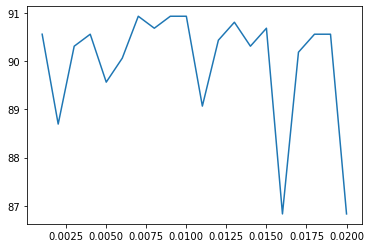

In [160]:
import matplotlib.pylab as plt

lists = sorted(accuracy_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [165]:
print(max(accuracy_dict, key=accuracy_dict.get))

0.007


In [161]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=32)
accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (np.amax(accuracy)*100))


Epoch 1/150
101/101 [==============================] - 1s 2ms/step - loss: 0.4376 - accuracy: 0.8416
Epoch 2/150
101/101 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8416
Epoch 3/150
101/101 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8416
Epoch 4/150
101/101 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8416
Epoch 5/150
101/101 [==============================] - 0s 1ms/step - loss: 0.4376 - accuracy: 0.8416
Epoch 6/150
101/101 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8416
Epoch 7/150
101/101 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8416
Epoch 8/150
101/101 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8416
Epoch 9/150
101/101 [==============================] - 0s 1ms/step - loss: 0.4376 - accuracy: 0.8416
Epoch 10/150
101/101 [==============================] - 0s 1ms/step - loss: 0.4376 - accura

In [162]:
print('Accuracy: %.2f' % (np.amax(accuracy)*100))
print(accuracy)

Accuracy: 86.83
[0.3927524983882904, 0.8683229684829712]


In [238]:
from sklearn.decomposition import PCA

pca = PCA(random_state=23)

pca.fit(X_train_resampled)

X_train_red = pca.transform(X_train_resampled)
X_val_red = pca.transform(X_test_scaled)


In [240]:
model = Sequential()
model.add(Dense(6, input_shape=(15,), activation='relu'))
model.add(Dense(6, activation='relu', activity_regularizer=l2(0.005)))
model.add(Dense(6, activation='relu',activity_regularizer=l2(0.005)))
model.add(Dense(1, activation='sigmoid',activity_regularizer=l2(0.005)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_red**2, y_train_resampled, epochs=150, batch_size=32)
accuracy = model.evaluate(X_val_red, y_test)

Epoch 1/150
170/170 [==============================] - 3s 4ms/step - loss: 0.6843 - accuracy: 0.5524
Epoch 2/150
170/170 [==============================] - 1s 3ms/step - loss: 0.6607 - accuracy: 0.6226
Epoch 3/150
170/170 [==============================] - 1s 3ms/step - loss: 0.6458 - accuracy: 0.6429
Epoch 4/150
170/170 [==============================] - 1s 4ms/step - loss: 0.6382 - accuracy: 0.6532
Epoch 5/150
170/170 [==============================] - 1s 4ms/step - loss: 0.6328 - accuracy: 0.6528
Epoch 6/150
170/170 [==============================] - 1s 3ms/step - loss: 0.6273 - accuracy: 0.6560
Epoch 7/150
170/170 [==============================] - 1s 3ms/step - loss: 0.6220 - accuracy: 0.6578
Epoch 8/150
170/170 [==============================] - 1s 3ms/step - loss: 0.6166 - accuracy: 0.6565
Epoch 9/150
170/170 [==============================] - 1s 4ms/step - loss: 0.6105 - accuracy: 0.6576
Epoch 10/150
170/170 [==============================] - 1s 3ms/step - loss: 0.6036 - accura

170/170 [==============================] - 1s 3ms/step - loss: 0.5047 - accuracy: 0.7536
Epoch 82/150
170/170 [==============================] - 1s 4ms/step - loss: 0.5035 - accuracy: 0.7519
Epoch 83/150
170/170 [==============================] - 1s 4ms/step - loss: 0.5032 - accuracy: 0.7512
Epoch 84/150
170/170 [==============================] - 1s 3ms/step - loss: 0.5025 - accuracy: 0.7560
Epoch 85/150
170/170 [==============================] - 1s 3ms/step - loss: 0.5032 - accuracy: 0.7505
Epoch 86/150
170/170 [==============================] - 1s 4ms/step - loss: 0.5023 - accuracy: 0.7536
Epoch 87/150
170/170 [==============================] - 1s 4ms/step - loss: 0.5025 - accuracy: 0.7523
Epoch 88/150
170/170 [==============================] - 1s 4ms/step - loss: 0.5021 - accuracy: 0.7536
Epoch 89/150
170/170 [==============================] - 1s 3ms/step - loss: 0.5025 - accuracy: 0.7560
Epoch 90/150
170/170 [==============================] - 1s 3ms/step - loss: 0.5005 - accuracy: 